# Loading Libraries

In [1]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from functools import partial
import numpy as np
from sklearn.model_selection import KFold

# Loading and Modifying Datasets

In [1]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

NameError: name 'keras' is not defined

In [ ]:
x_train.shape
# no of items, pixel row, pixel col, rgb

(50000, 32, 32, 3)

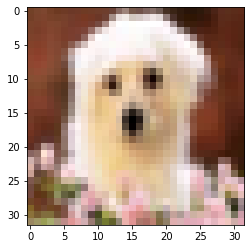

In [ ]:
plt.imshow(x_train[534,:,:,:])

# Sharing puppy image for positive vibes

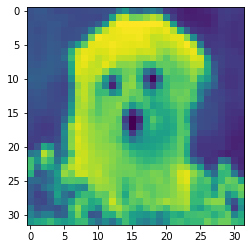

In [ ]:
x = x_train[534,:,:,1]
x.shape

max_pool_2d = tf.keras.layers.MaxPooling2D(pool_size=3, strides=3, padding='valid')
x = tf.reshape(x, [1, 32, 32, 1])
max_pool_2d(x)
plt.imshow((tf.squeeze(x)))


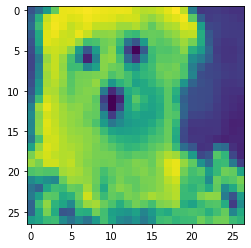

In [ ]:
x2 = x_train[534,5:,5:,1]
x2.shape
max_pool_2d = tf.keras.layers.MaxPooling2D(pool_size=3, strides=3, padding='valid')
x2 = tf.reshape(x2, [1, 27, 27, 1])
max_pool_2d(x2)
plt.imshow((tf.squeeze(x2)))

In [ ]:
# x_train = tf.keras.utils.normalize(x_train)
# x_test = tf.keras.utils.normalize(x_test)
# y_train = tf.keras.utils.to_categorical(y_train)
# y_test = tf.keras.utils.to_categorical(y_test)

x_train = (x_train - 255.0)/255.0
x_test = (x_test - 255.0)/255.0
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

# Creating and Running Model

In [ ]:
DefaultConv2D = partial(keras.layers.Conv2D, kernel_size=3, activation='relu', padding="same")

model = keras.models.Sequential([
    DefaultConv2D(filters=32, input_shape=(32,32,3)),
    DefaultConv2D(filters=32),           
    keras.layers.MaxPooling2D(pool_size=2), 
    keras.layers.Dropout(0.5),

    DefaultConv2D(filters=64),
    DefaultConv2D(filters=64),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Dropout(0.5),

    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Dropout(0.5),
    
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=10, activation='softmax')])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                        

In [ ]:
model.compile(optimizer = "nadam", loss = "categorical_crossentropy", metrics = ["accuracy"])
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 50, batch_size=100)

Epoch 1/50
480/480 [==============================] - 23s 43ms/step - loss: 2.0582 - accuracy: 0.2348 - val_loss: 1.8345 - val_accuracy: 0.3298
Epoch 2/50
351/480 [====================>.........] - ETA: 4s - loss: 1.7981 - accuracy: 0.3487

KeyboardInterrupt: ignored

# Cross Validation

In [ ]:
X = np.concatenate([x_train, x_test], axis=0)
y = np.concatenate([y_train, y_test], axis=0)

kf = KFold(n_splits=5)
scores = []
for train, test in kf.split(X):
    x6_train, x_test = X[train], X[test]
    y_train, y_test = y[train], y[test]
    DefaultConv2D = partial(keras.layers.Conv2D, kernel_size=3, activation='relu', padding="same")
    model = keras.models.Sequential([
        DefaultConv2D(filters=32, input_shape=(32,32,3)),
        DefaultConv2D(filters=32),           
        keras.layers.MaxPooling2D(pool_size=2), 
        keras.layers.Dropout(0.5),

        DefaultConv2D(filters=64),
        DefaultConv2D(filters=64),
        keras.layers.MaxPooling2D(pool_size=2),
        keras.layers.Dropout(0.5),

        DefaultConv2D(filters=128),
        DefaultConv2D(filters=128),
        keras.layers.MaxPooling2D(pool_size=2),
        keras.layers.Dropout(0.5),
        
        keras.layers.Flatten(),
        keras.layers.Dense(units=128, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(units=10, activation='softmax')])
    model.compile(optimizer = "nadam", loss = "categorical_crossentropy", metrics = ["accuracy"])
    model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 50, batch_size=100)
    score = model.evaluate(x_test, y_test)
    scores.append(score[1])

scores

375/375 [==============================] - 3s 7ms/step - loss: 1.7893 - accuracy: 0.3296


[0.09941666573286057,
 0.3372499942779541,
 0.3720000088214874,
 0.3489166796207428,
 0.3295833468437195]

# Question Solution

Some practical issues one would face while implementing this on a phone are as follows:
*   The aspect ratio of the images will be needed to be fixed
*   Images will have a higher resolution, which might make the classification slow.
*   Taking so many images (given it is to aid a blind person) will affect the mobile's memory and computational abilities.
*   Segmentation might become another issue, especially given how there is not just one obstacle to segment usually.




In [ ]:
import tensorflow as tf
import keras

In [ ]:
x = tf.constant([0.,0.,1.,1.,0.,0.,1.,1.])
x = tf.reshape(x, [1, 8, 1])
max_pool_1d = tf.keras.layers.MaxPooling1D(pool_size=3, strides=1, padding='valid')
max_pool_1d(x)

<tf.Tensor: shape=(1, 6, 1), dtype=float32, numpy=
array([[[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]]], dtype=float32)>

In [ ]:
x = tf.constant([0.,1.,1.,0.,0.,1.,1.])
x = tf.reshape(x, [1, 7, 1])
max_pool_1d = tf.keras.layers.MaxPooling1D(pool_size=3, strides=1, padding='valid')
max_pool_1d(x)

<tf.Tensor: shape=(1, 5, 1), dtype=float32, numpy=
array([[[1.],
        [1.],
        [1.],
        [1.],
        [1.]]], dtype=float32)>